In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['../'])

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0] on linux


In [2]:
import numpy as np
from scripts.data_utils import load_data, get_random_split, augment_data, get_multiple_splits, get_connectome
from scripts.augmentation_models import augmentaion_noise_jittering

from scripts.classification_models import LogRegPCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
path_to_dataset = '/data/Projects/OpenCloseIHB/ihb_dataset.hdf5'

# единичный сплит
X, y, groups = load_data(path_to_dataset)
X_train, X_test, y_train, y_test, train_groups, test_groups = get_random_split(X, y, groups, test_size=0.15)

In [7]:
# обучение на одном сплите

logreg = LogRegPCA()
#logreg.model.set_params(**{'C': 0.002})
#logreg.pca.set_params(**{'n_components': 0.95})

train_acc = logreg.model_training(X_train, y_train)
conf_mat, acc = logreg.model_testing(X_test, y_test)

Accuracy on train: 1.0
Accuracy on test: 0.885


In [8]:
# аугментация шумом
X_aug, y_aug, groups_aug, is_real_data = augment_data(augmentaion_noise_jittering, 
                                                      X, y, groups, n_aug=1)


# сплит данных по разным сидам
random_seeds = [42, 123, 456, 3, 6, 90, 33, 12, 73, 1]

# аугментированные + реальные
splits_with_seeds_aug = get_multiple_splits(X_aug, y_aug, groups_aug, 
                                            is_real_data, test_size=0.2, 
                                            random_seeds=random_seeds)

# реальные
splits_with_seeds = get_multiple_splits(X, y, groups, 
                                        None, test_size=0.2, 
                                        random_seeds=random_seeds)

In [10]:
# реальные данные 

logreg_metrics_real = np.zeros((len(random_seeds)))

for en, (X_train, X_test, y_train, y_test, train_groups, test_groups) in enumerate(splits_with_seeds):
    print(f'------ Seed: {random_seeds[en]} ------')
    
    logreg = LogRegPCA()
    logreg.model.set_params(**{'C': 0.001})
    logreg.pca.set_params(**{'n_components': 0.90})

    train_acc = logreg.model_training(X_train, y_train)
    logreg_metrics_real[en] = logreg.model_testing(X_test, y_test)[1]


------ Seed: 42 ------
Accuracy on train: 0.978
Accuracy on test: 0.824
------ Seed: 123 ------
Accuracy on train: 0.985
Accuracy on test: 0.794
------ Seed: 456 ------
Accuracy on train: 1.0
Accuracy on test: 0.882
------ Seed: 3 ------
Accuracy on train: 0.985
Accuracy on test: 0.853
------ Seed: 6 ------
Accuracy on train: 0.993
Accuracy on test: 0.794
------ Seed: 90 ------
Accuracy on train: 1.0
Accuracy on test: 0.882
------ Seed: 33 ------
Accuracy on train: 0.985
Accuracy on test: 0.853
------ Seed: 12 ------
Accuracy on train: 0.985
Accuracy on test: 0.853
------ Seed: 73 ------
Accuracy on train: 0.993
Accuracy on test: 0.824
------ Seed: 1 ------
Accuracy on train: 0.978
Accuracy on test: 0.912


In [14]:
# аугментация

logreg_metrics_aug = np.zeros((len(random_seeds)))

for en, (X_train, X_test, y_train, y_test, train_groups, test_groups) in enumerate(splits_with_seeds_aug):
    print(f'------ Seed: {random_seeds[en]} ------')

    logreg = LogRegPCA()
    logreg.model.set_params(**{'C': 0.001})
    logreg.pca.set_params(**{'n_components': 0.90})

    train_acc = logreg.model_training(X_train, y_train)
    logreg_metrics_aug[en] = logreg.model_testing(X_test, y_test)[1]


------ Seed: 42 ------
Accuracy on train: 0.993
Accuracy on test: 0.824
------ Seed: 123 ------
Accuracy on train: 0.993
Accuracy on test: 0.794
------ Seed: 456 ------
Accuracy on train: 1.0
Accuracy on test: 0.912
------ Seed: 3 ------
Accuracy on train: 0.993
Accuracy on test: 0.824
------ Seed: 6 ------
Accuracy on train: 0.993
Accuracy on test: 0.824
------ Seed: 90 ------
Accuracy on train: 1.0
Accuracy on test: 0.882
------ Seed: 33 ------
Accuracy on train: 0.993
Accuracy on test: 0.853
------ Seed: 12 ------
Accuracy on train: 0.993
Accuracy on test: 0.853
------ Seed: 73 ------
Accuracy on train: 0.993
Accuracy on test: 0.824
------ Seed: 1 ------
Accuracy on train: 0.989
Accuracy on test: 0.912


In [16]:
# без PCA 

logreg_metrics_no_pca = np.zeros((len(random_seeds)))

for en, (X_train, X_test, y_train, y_test, train_groups, test_groups) in enumerate(splits_with_seeds):
    print(f'------ Seed: {random_seeds[en]} ------')

    logreg = LogRegPCA(pca=False)
    logreg.model.set_params(**{'C': 0.001})

    train_acc = logreg.model_training(X_train, y_train)
    logreg_metrics_no_pca[en] = logreg.model_testing(X_test, y_test)[1]


------ Seed: 42 ------
Accuracy on train: 1.0
Accuracy on test: 0.824
------ Seed: 123 ------
Accuracy on train: 1.0
Accuracy on test: 0.765
------ Seed: 456 ------
Accuracy on train: 1.0
Accuracy on test: 0.882
------ Seed: 3 ------
Accuracy on train: 1.0
Accuracy on test: 0.853
------ Seed: 6 ------
Accuracy on train: 1.0
Accuracy on test: 0.824
------ Seed: 90 ------
Accuracy on train: 1.0
Accuracy on test: 0.882
------ Seed: 33 ------
Accuracy on train: 1.0
Accuracy on test: 0.824
------ Seed: 12 ------
Accuracy on train: 1.0
Accuracy on test: 0.882
------ Seed: 73 ------
Accuracy on train: 1.0
Accuracy on test: 0.824
------ Seed: 1 ------
Accuracy on train: 1.0
Accuracy on test: 0.912


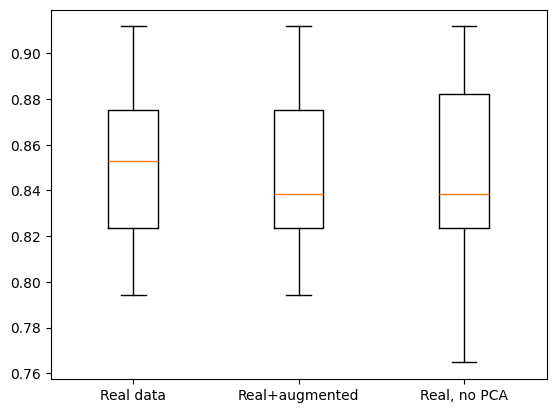

In [17]:
plt.boxplot([logreg_metrics_real.flatten(), 
             logreg_metrics_aug.flatten(),
             logreg_metrics_no_pca.flatten()],
            tick_labels=['Real data', 'Real+augmented', 'Real, no PCA']);

### gnn